In [1]:
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data=pd.read_csv("10000 BT Records.csv")

In [3]:
data['Balance']=pd.to_numeric(data['Balance'].str.replace(',',''), errors='coerce')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         10000 non-null  object 
 1   Description  10000 non-null  object 
 2   Deposits     10000 non-null  object 
 3   Withdrawls   10000 non-null  object 
 4   Balance      10000 non-null  float64
dtypes: float64(1), object(4)
memory usage: 390.8+ KB


In [6]:
#convert date to datetime
data['Date']=pd.to_datetime(data['Date'], format='%d-%b-%Y')

In [7]:
#sort the data value with new date
data=data.sort_values(by='Date')

In [9]:
#locate the first month
firstmonth=data['Date'].dt.to_period('M').iloc[0]
print(firstmonth)

2020-08


In [11]:
#create data set
firstmonthdata=data[data['Date'].dt.to_period('M')==firstmonth]
print(firstmonthdata)

          Date Description      Deposits  Withdrawls     Balance
0   2020-08-20        Cash     97,540.00       00.00   170542.01
24  2020-08-20        NEFT  1,986,737.80       00.00  1992819.23
25  2020-08-20    Reversal         00.00  664,273.08  1328546.15
26  2020-08-20        Cash         03.81       00.00  1328549.96
27  2020-08-20        RTGS      1,474.00       00.00  1330023.96
..         ...         ...           ...         ...         ...
289 2020-08-30      Cheque         00.00       57.81       57.80
296 2020-08-30         ATM      3,312.00       00.00  1054995.46
287 2020-08-30        RTGS         00.00       26.98      134.88
307 2020-08-31  Commission         17.00       00.00   440469.07
308 2020-08-31    Interest         00.00  220,234.54   220234.54

[309 rows x 5 columns]


In [12]:
#sum up the dates
firstmonthsum=firstmonthdata.groupby('Date')['Balance'].sum().reset_index()
print(firstmonthsum)

         Date      Balance
0  2020-08-20  21398384.09
1  2020-08-21   6056774.48
2  2020-08-22   8512223.81
3  2020-08-23  25165555.16
4  2020-08-24  23158134.02
5  2020-08-25      6307.69
6  2020-08-26    102888.01
7  2020-08-27  11917708.62
8  2020-08-28   3200809.09
9  2020-08-29  12315154.47
10 2020-08-30   7894691.97
11 2020-08-31    660703.61


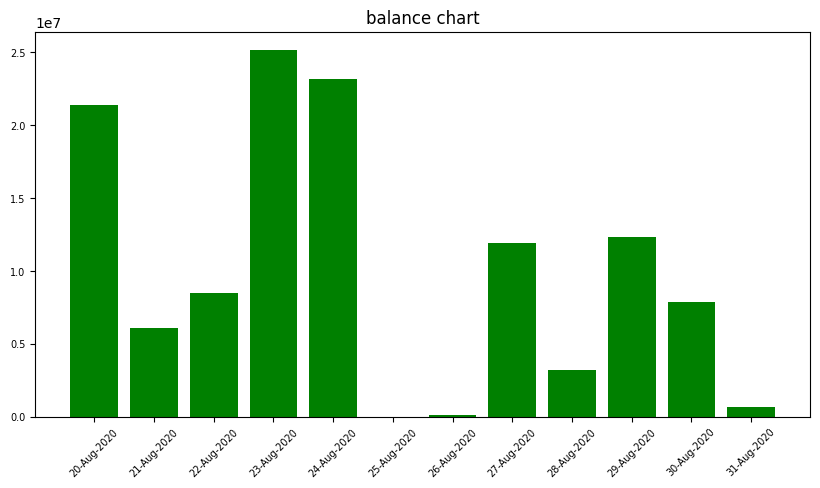

In [15]:
plt.figure(figsize=(10,5))
plt.bar(firstmonthsum['Date'].dt.strftime('%d-%b-%Y'),firstmonthsum['Balance'],color='g')
plt.xticks(rotation=45,fontsize=7)
plt.yticks(fontsize=7)
plt.title('balance chart')
plt.show()